## **군집화모델 알아보기**

### <b> <font color=green> [데이터 준비하기]     
### [군집화모델 구현하기] </font> </b>     
1) 사용 라이브러리 파악하고 가져오기    
2) 모델 객체 생성하고 학습하기   
3) 모델 예측하기     
4) 군집 결과 시각화하기

##<font color=green> **[ 데이터 준비하기 ]**

### **Step 0 : 파일 다운로드하기**
- 아래 셀을 실행시켜 프로젝트에 사용할 데이터 파일을 colab 작업환경으로 다운로드한다.
> wine.csv

In [ ]:
#!gdown 1GyrdfCuNzZDZJyzAJCrpq0-L7po_W6ZW

Downloading...
From: https://drive.google.com/uc?id=1GyrdfCuNzZDZJyzAJCrpq0-L7po_W6ZW
To: /content/II-03_wine.csv
100% 4.48k/4.48k [00:00<00:00, 4.11MB/s]


### **Step 1 : 데이터 확인하기**
* 데이터 전처리에 사용되는 판다스 라이브러리를 가져와 pd 로 사용한다.

In [2]:
#코드작성
import pandas as pd

* 'wine.csv'파일을 읽어 'df'에 저장한 후 내용을 출력한다.

In [3]:
#코드작성
df = pd.read_csv('data/wine.csv')
df.head()

,alcohol,malic_acid,total_phenols,color_intensity,hue
0,14.23,1.71,2.80,5.64,1.04
1,13.20,1.78,2.65,4.38,1.05
2,13.16,2.36,2.80,5.68,1.03
3,14.37,1.95,3.85,7.80,0.86
4,13.24,2.59,2.80,4.32,1.04


* 데이터 정보를 파악한다.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alcohol          178 non-null    float64
 1   malic_acid       178 non-null    float64
 2   total_phenols    178 non-null    float64
 3   color_intensity  178 non-null    float64
 4   hue              178 non-null    float64
dtypes: float64(5)
memory usage: 7.1 KB


| 번호 | 이름 | 내용 |
|---------|------|------|
| 0 | alcohol | 알코올 |
| 1 | malic_acid  | 사과산 |
| 2 | total_phenols | 총 페놀 |
| 3 | color_intensity	  | 색 강도 |
| 4 | hue | 색상

### **step2. 데이터 준비하기**
- 특성 항목으로 'X'를 'alcohol'과 'malic_acid'으로 지정한다.

In [5]:
#코드작성
X = df[['alcohol', 'malic_acid']]

In [6]:
X.head()

,alcohol,malic_acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


## <font color=green> **[기계학습 군집화 모델 구현]** </font>

###**step1. 라이브러리 가져오기**
- K-평균알고리즘 모델을 구현하기 위한 라이브러리를 가져온다. (scikit learn 라이브러리의 K평균 알고리즘 Kmeans 분류기 사용)

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### **Step 2 : 모델 객체 생성하기**
- KMeans( ) 모델 객체 model_km의 군집 개수를 3으로 하여 생성한다.

In [8]:
model_km = KMeans(n_clusters=3) #코드작성

### **Step 3 : 모델 예측하기**  

#### 1) K-평균 알고리즘 모델 학습하고 결과 확인하기

In [9]:
#코드작성
model_km.fit(X)

c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\intel09\anaconda3\envs\envtest\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, a

KMeans(n_clusters=3)

- model_km.cluster_centers_에 저장된 각 군집의 중심점을 확인한다.

In [10]:
#코드작성
model_km.cluster_centers_

array([[13.0632    ,  3.8948    ],
       [12.20032258,  1.66532258],
       [13.705     ,  1.78606061]])

- 학습 후 군집화 결과가 저장된 model_km.labels_에 각 데이터별 군집 번호 0, 1, 2이 저장된 것을 확인한다.

In [11]:
#코드작성
model_km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       2, 0], dtype=int32)

- 각 군집별 데이터 수를 확인한다.

In [12]:
#코드작성
pd.Series(model_km.labels_).value_counts()

2    66
1    62
0    50
Name: count, dtype: int64

#### 2) 군집 결과 그래프로 시각화하기

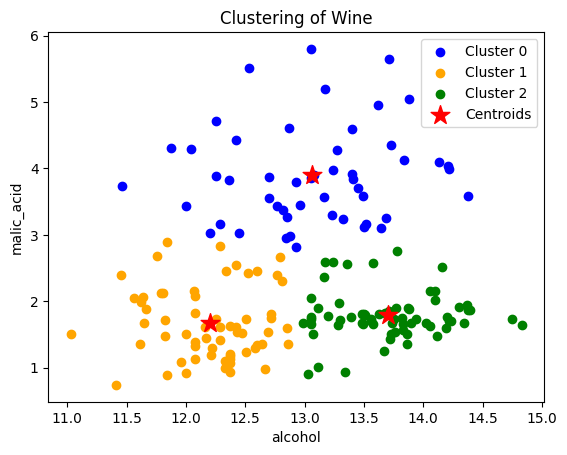

In [13]:
plt.figure()

plt.title('Clustering of Wine')
plt.xlabel(X.columns[0])   # alcohol
plt.ylabel(X.columns[1])   # malic_acid

plt.scatter ( X.iloc[model_km.labels_== 0,0],
    X.iloc[model_km.labels_ == 0,1], c='blue',   label='Cluster 0')
plt.scatter ( X.iloc[model_km.labels_ == 1,0],
    X.iloc[model_km.labels_ == 1,1], c='orange', label='Cluster 1')
plt.scatter ( X.iloc[model_km.labels_ == 2,0],
    X.iloc[model_km.labels_ == 2,1], c='green',  label='Cluster 2')

plt.scatter(model_km.cluster_centers_[:, 0],
            model_km.cluster_centers_[:, 1],
            c='red', marker='*', s=200, label ='Centroids' )

plt.legend()
plt.show()

### **Step 4 : 모델 예측하기**
- 학습된 모델을 사용하여 임의의 테스트 데이터의 군집 번호를 확인한다. (예, alcohol
= 14, malic_acid = 4）


In [14]:
print ( model_km.predict(pd.DataFrame( {'alcohol':[14], 'malic_acid' : [4]} )))

[0]


- 앞에서 그린 그래프에 테스트 데이터를 표시하고 해당 군집에 속하는지 확인한다.

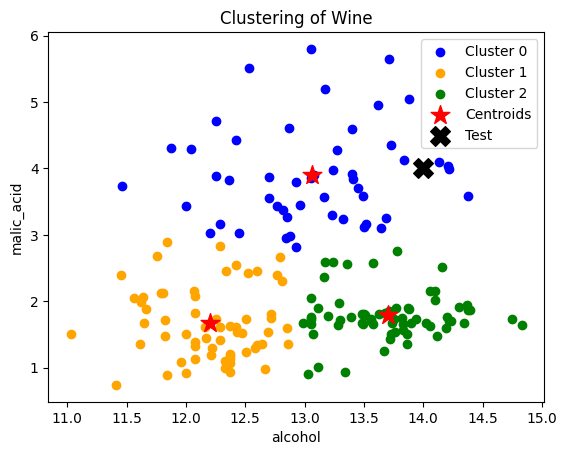

In [15]:
plt.figure()

plt.title('Clustering of Wine')
plt.xlabel(X.columns[0])   # alcohol
plt.ylabel(X.columns[1])   # malic_acid

plt.scatter ( X.iloc[model_km.labels_== 0,0],
    X.iloc[model_km.labels_ == 0,1], c='blue',   label='Cluster 0')
plt.scatter ( X.iloc[model_km.labels_ == 1,0],
    X.iloc[model_km.labels_ == 1,1], c='orange', label='Cluster 1')
plt.scatter ( X.iloc[model_km.labels_ == 2,0],
    X.iloc[model_km.labels_ == 2,1], c='green',  label='Cluster 2')

plt.scatter(model_km.cluster_centers_[:, 0],
            model_km.cluster_centers_[:, 1],
            c='red', marker='*', s=200, label ='Centroids' )

plt.scatter(14, 4, c='black', marker='X', s=200, label='Test' )

plt.legend()
plt.show()